In the world of computer, everything becomes numbers. 
That includes images. 
Computer sees images or pictures as a grid of numbers, or mathematically speaking Matrix. 
Each cell or element of the matrix represents Pixel of the image. 
The value of each cell can be 
- binary (0 or 1) for black & white images
- 0 - 255 for 8-bit gray scale images
- a set of 3 numbers for RGB images

The location or coordinate of each pixel is also important. 
Each image is 2-D plane, therefore, the coordinate is (x, y).
Please note that the origin (0, 0) locates on the top-left corner.
This is different than the mathematical number plane.
Additional, the number 1 is added as the third element of the coordinate.
For example, the pixel (0, 1) will be 
$$
\begin{pmatrix}
0\\
1 \\
1
\end{pmatrix}
$$



To move the pixel's location, we multiply a location with a 3x3 matrix. 
For example,
$$
\begin{pmatrix}
1 \\
3 \\
1
\end{pmatrix}
=
\begin{pmatrix}
1 & 0 & 1 \\
0 & 1 & 2 \\
0 & 0 & 1
\end{pmatrix}
\begin{pmatrix}
0 \\
1 \\
1
\end{pmatrix}
$$

In [1]:
import cv2 as cv
import numpy as np
from pathlib import Path
from PIL import Image

In [2]:
path = Path("../img") / 'cv-example1.jpg'
img = Image.open(path)

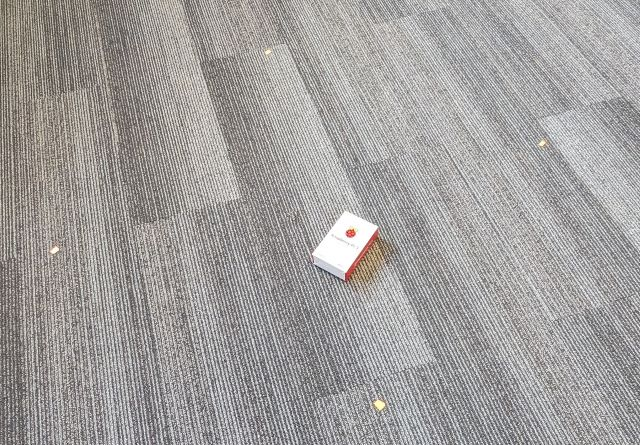

In [3]:
img

In [4]:
corners = [(266, 51), (544, 144), (56, 250), (380, 405)]

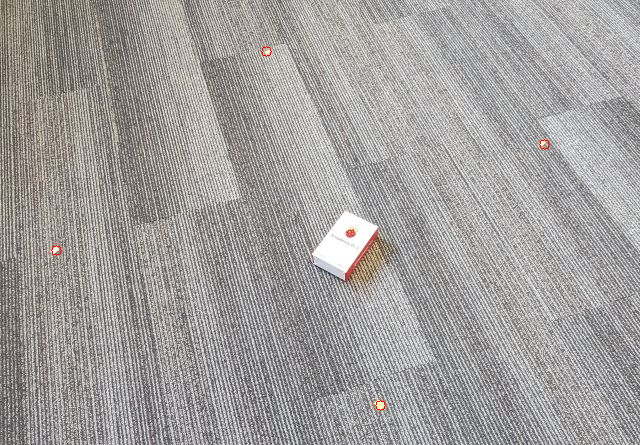

In [5]:
img = Image.open(path)
img = np.array(img)
for point in corners:
    img = cv.circle(img, point, 5, (255, 0, 0))
Image.fromarray(img)

In [6]:
img = Image.open(path)
img = np.array(img)

In [7]:
target = [(0, 0), (300, 0), (0, 300), (300, 300)]

In [8]:
H = cv.getPerspectiveTransform(
    np.array(corners, dtype="float32"), np.array(target, dtype="float32")
)

In [9]:
img_flat = cv.warpPerspective(img, H, (300, 300))

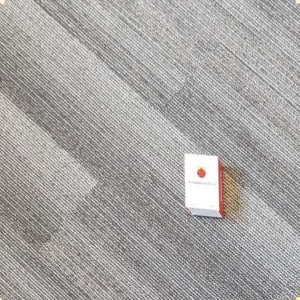

In [10]:
Image.fromarray(img_flat)